# The orthogonal Procrustes problem

Originally, this problem questioned ways of finding orthogonal transformation between two matrices. Maybe that doesn't sound relevant to real computer vision applications, but that feeling may change when you consider the fact that a set of points is indeed a matrix. Camera calibration, rigid body transformations, photogrammetry issues, and many other tasks require solving of the orthogonal Procrustes problem. In this recipe, we find a solution to the simple task of estimation point set rotation and examine how our solution is influenced by noisy input data.



In [1]:
# Import all of the necessary modules
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

%matplotlib auto
%pylab inline


def print_image(header,name,np_arr,start_First=0, end_First=1, start_Second=0, end_Second=2,start_3=0, end_3=5):
    print("------  {0:-<25}    Shape{1} {2}: {3:}".format(header, np_arr.shape, name, str(np_arr.dtype)) )
    shapes = np_arr.shape #print(shapes)
    if shapes[0] < end_First:
        end_First = shapes[0]
    if shapes[1] < end_Second:
        end_Second = shapes[1]
    if len(shapes)==3:
        if shapes[2] < end_3:
            end_3 = shapes[2]
    if len(shapes)==3:
        for i in range (start_First,end_First):
            print("[", sep='',end="")
            for j in range (start_Second,end_Second):
                print(np_arr[i,j,start_3:end_3], sep=' ', end=" ")
            print(']')
    if len(shapes)==2:
        for i in range (start_First,end_First):
            print("[", end=" ")
            #print(np_arr[i,start_Second:end_Second],sep=' ',end=" ") cutoff sting by<60
            for k in range (start_Second,end_Second):
                print(np_arr[i,k], end=" ")
            print(']')
def plt_view_image(plt,list_images,figsize=(15,6), axis="off", cmap='gray'):
    #%pylab inline
    plt.figure(figsize=figsize)
    n = len(list_images)  #; print(n)
    plot_number = 1
    for name, img in list_images:
        plt.subplot(1,n,plot_number)
        plt.axis(axis)
        plt.title(name)
        if cmap =='gray':
            plt.imshow(img,cmap='gray' )
        else:
            plt.imshow(img )
        plot_number = plot_number + 1
    plt.show()
#help("modules")   
import sys             
print('\n'.join(sys.path))
print("current folder ==",os.getcwd())
#pip list"

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib
D:\HTML_DOC\Program\opencv\Packt\S06\env
C:\Program Files\Python38\python38.zip
C:\Program Files\Python38\DLLs
C:\Program Files\Python38\lib
C:\Program Files\Python38
d:\html_doc\program\opencv\packt\s06\env

d:\html_doc\program\opencv\packt\s06\env\lib\site-packages
d:\html_doc\program\opencv\packt\s06\env\lib\site-packages\pip-20.0.2-py3.8.egg
d:\html_doc\program\opencv\packt\s06\env\lib\site-packages\win32
d:\html_doc\program\opencv\packt\s06\env\lib\site-packages\win32\lib
d:\html_doc\program\opencv\packt\s06\env\lib\site-packages\Pythonwin
d:\html_doc\program\opencv\packt\s06\env\lib\site-packages\IPython\extensions
C:\Users\polit\.ipython
current folder == D:\HTML_DOC\Program\opencv\Packt\S06\env


Generate an initial points set. Then create a set of rotated points by applying a rotation matrix to the initial points. Also, add a portion of noise to our rotated points:

------  pts----------------------    Shape(50, 2) pts: float64
[ 138.446882421075 284.0224247835971 ]
[ 107.68225100994503 306.41920641500184 ]
[ 160.2352399797394 302.7428573573656 ]
[ 93.95661501479029 268.5145263476834 ]
[ 154.32949513128915 321.69141652604003 ]


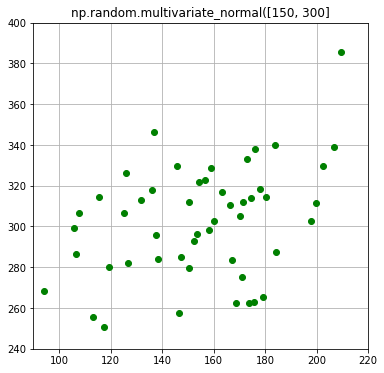

In [2]:
np.random.seed(42)
pts = np.random.multivariate_normal([150, 300], [[1024, 512], [512, 1024]], 50)

#######################################
print_image('pts','pts',pts,0,5,0,4)

plt.figure(figsize=(6,6))
plt.axis('on'); plt.grid(); plt.ylim(240, 400); plt.xlim(90, 220);
plt.title('np.random.multivariate_normal([150, 300]')
plt.plot(pts[:,0],pts[:,1],'o', color="green")
plt.show()

------  rmat---------------------    Shape(2, 2) rmat: float64
[ 0.8660254037844387 0.49999999999999994 ]
[ -0.49999999999999994 0.8660254037844387 ]


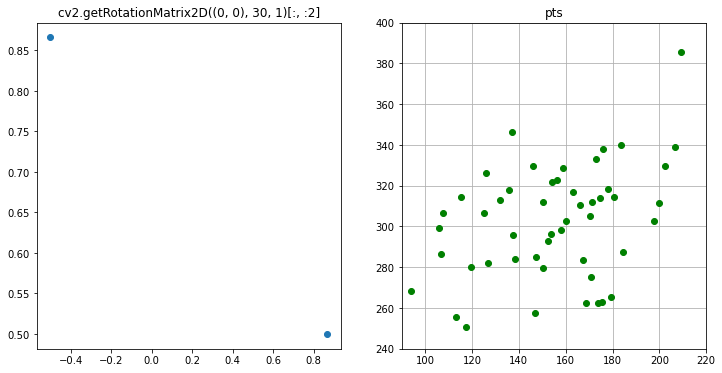

In [3]:
rmat = cv2.getRotationMatrix2D((0, 0), 30, 1)[:, :2]


#############################################
print_image('rmat','rmat',rmat,0,5,0,4)

plt.figure(figsize=(12,6))
plt.subplot(121)
plt.axis('on')
plt.title('cv2.getRotationMatrix2D((0, 0), 30, 1)[:, :2]')
plt.plot(rmat[:,0],rmat[:,1],'o')

plt.subplot(122)
plt.axis('on'); plt.grid(); plt.ylim(240, 400); plt.xlim(90, 220);
plt.title('pts')
plt.plot(pts[:,0],pts[:,1],'o', color="green")
plt.show()

------  pts----------------------    Shape(50, 2) pts: float64
[ 138.446882421075 284.0224247835971 ]
[ 107.68225100994503 306.41920641500184 ]
[ 160.2352399797394 302.7428573573656 ]
[ 93.95661501479029 268.5145263476834 ]
[ 154.32949513128915 321.69141652604003 ]
------  rmat---------------------    Shape(2, 2) rmat: float64
[ 0.8660254037844387 0.49999999999999994 ]
[ -0.49999999999999994 0.8660254037844387 ]
------  rpts---------------------    Shape(50, 2) rpts: float64
[ 261.90972964320673 176.74719389651256 ]
[ 246.46516811880582 211.52569145788672 ]
[ 290.139217082633 182.0653852958976 ]
[ 215.62607863024448 185.56209359484467 ]
[ 294.4989715999433 201.42819132530732 ]


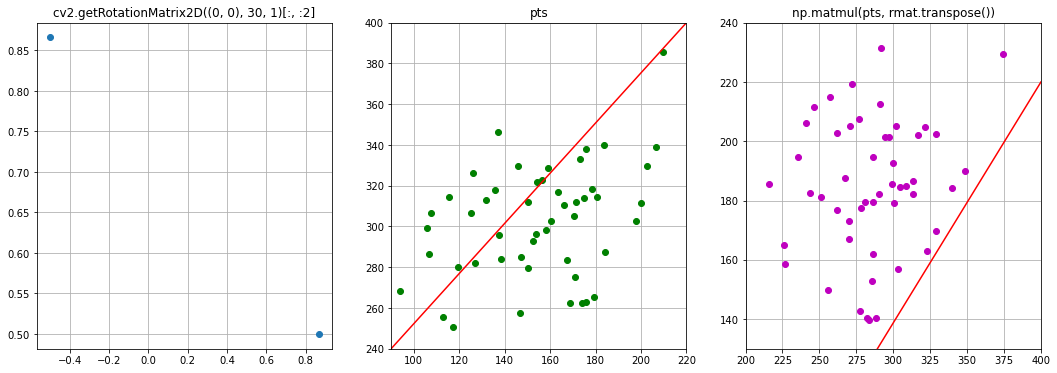

In [4]:
rpts = np.matmul(pts, rmat.transpose())


#############################################
print_image('pts','pts',pts,0,5,0,4)
print_image('rmat','rmat',rmat,0,5,0,4)
print_image('rpts','rpts',rpts,0,5,0,4)


plt.figure(figsize=(18,6))
plt.subplot(131)
plt.axis('on'); plt.grid();
plt.title('cv2.getRotationMatrix2D((0, 0), 30, 1)[:, :2]')
plt.plot(rmat[:,0],rmat[:,1],'o')

plt.subplot(132)
plt.axis('on'); plt.grid(); plt.ylim(240, 400); plt.xlim(90, 220);
plt.title('pts')
plt.plot(pts[:,0],pts[:,1],'o',color="green")
plt.plot([90,220], [240,400], color='red')

plt.subplot(133)
plt.axis('on'); plt.grid(); plt.xlim(200, 400); plt.ylim(130, 240);
plt.title('np.matmul(pts, rmat.transpose())')
plt.plot(rpts[:,0],rpts[:,1],'o', color="m")
plt.plot([240,400], [90,220], color='red')
plt.show()

------  pts----------------------    Shape(50, 2) pts: float64
[ 138.446882421075 284.0224247835971 ]
[ 107.68225100994503 306.41920641500184 ]
[ 160.2352399797394 302.7428573573656 ]
[ 93.95661501479029 268.5145263476834 ]
[ 154.32949513128915 321.69141652604003 ]
------  rmat---------------------    Shape(2, 2) rmat: float64
[ 0.8660254037844387 0.49999999999999994 ]
[ -0.49999999999999994 0.8660254037844387 ]
------  rpts---------------------    Shape(50, 2) rpts: float64
[ 261.90972964320673 176.74719389651256 ]
[ 246.46516811880582 211.52569145788672 ]
[ 290.139217082633 182.0653852958976 ]
[ 215.62607863024448 185.56209359484467 ]
[ 294.4989715999433 201.42819132530732 ]
------  rpts_noise---------------    Shape(50, 2) rpts_noise: float64
[ 268.93432856131824 174.79184139742927 ]
[ 255.62486726656184 233.0645862462005 ]
[ 286.82778830054133 178.75418869619466 ]
[ 237.959520445884 196.41525961688635 ]
[ 287.85960116218337 209.10114904571742 ]


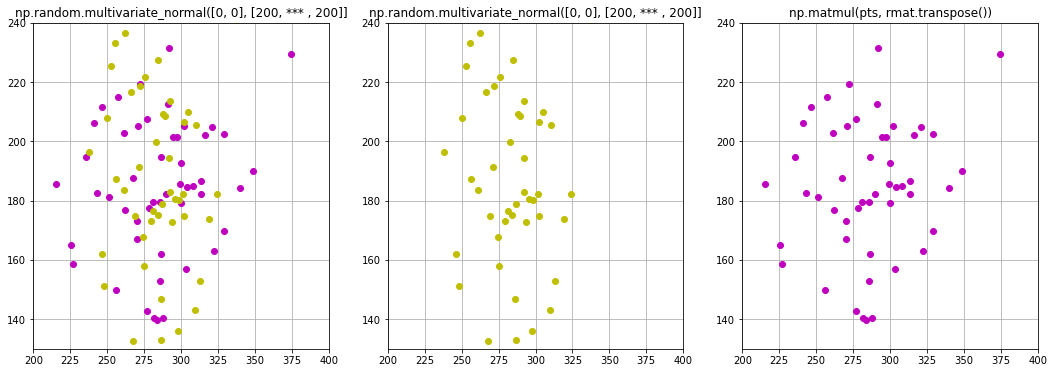

In [5]:
np.random.seed(42)
rpts_noise = rpts + np.random.multivariate_normal([0, 0], [[200, 0], [0, 200]], len(pts))



#############################################
print_image('pts','pts',pts,0,5,0,4)
print_image('rmat','rmat',rmat,0,5,0,4)
print_image('rpts','rpts',rpts,0,5,0,4)
print_image('rpts_noise','rpts_noise',rpts_noise,0,5,0,4)

plt.figure(figsize=(18,6))

plt.subplot(131)
plt.axis('on'); plt.grid(); plt.xlim(200, 400); plt.ylim(130, 240);
plt.title('np.matmul(pts, rmat.transpose())')
plt.plot(rpts[:,0],rpts[:,1],'o', color="m")
plt.axis('on')
plt.title('np.random.multivariate_normal([0, 0], [200, *** , 200]]')
plt.plot(rpts_noise[:,0],rpts_noise[:,1],'o',color="y")

plt.subplot(132)
plt.axis('on'); plt.grid(); plt.xlim(200, 400); plt.ylim(130, 240);
plt.title('np.random.multivariate_normal([0, 0], [200, *** , 200]]')
plt.plot(rpts_noise[:,0],rpts_noise[:,1],'o',color="y")

plt.subplot(133)
plt.axis('on'); plt.grid(); plt.xlim(200, 400); plt.ylim(130, 240);
plt.title('np.matmul(pts, rmat.transpose())')
plt.plot(rpts[:,0],rpts[:,1],'o', color="m")
plt.show()

Solve the orthogonal Procrustes problem using **Singular Value Decomposition (SVD)** and get an estimate of the rotation matrix:

------  M------------------------    Shape(2, 2) M: float64
[ 2223978.8269045725 1402915.3787384506 ]
[ 4307733.569786189 2812796.7370990063 ]
------  rmat---------------------    Shape(2, 2) rmat: float64
[ 0.8660254037844387 0.49999999999999994 ]
[ -0.49999999999999994 0.8660254037844387 ]
------  rmat_est-----------------    Shape(2, 2) rmat_est: float64
[ 0.86626105343858 0.49959162052168354 ]
[ -0.49959162052168354 0.86626105343858 ]


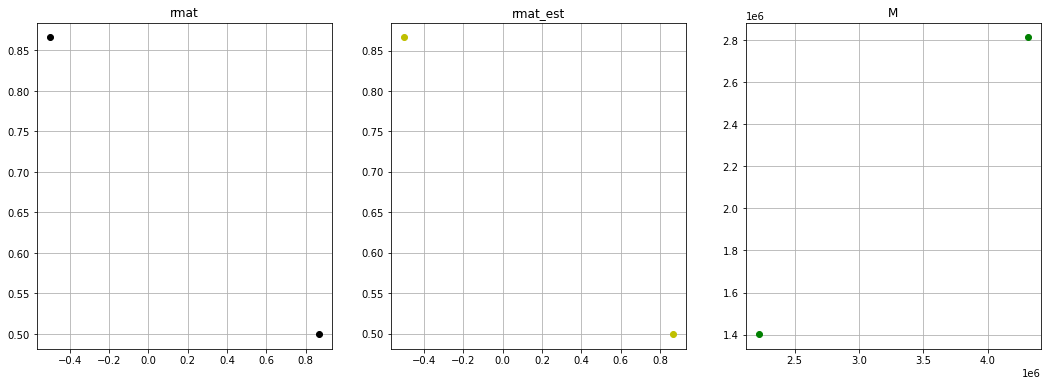

In [6]:
M = np.matmul(pts.transpose(), rpts_noise)

sigma, u, v_t = cv2.SVDecomp(M)

rmat_est = np.matmul(v_t, u).transpose()


#############################################
print_image('M','M',M,0,5,0,4)
print_image('rmat','rmat',rmat,0,5,0,4)
print_image('rmat_est','rmat_est',rmat_est,0,5,0,4)

plt.figure(figsize=(18,6))
plt.subplot(131)
plt.axis('on'); plt.grid();
plt.title('rmat')
plt.plot(rmat[:,0],rmat[:,1],'o', color ="k")

plt.subplot(132)
plt.grid(); plt.title('rmat_est');
plt.plot(rmat_est[:,0],rmat_est[:,1],'o', color="y")

plt.subplot(133)
plt.axis('on'); plt.grid();
plt.title('M')
plt.plot(M[:,0],M[:,1],'o',color="green")

plt.show()

 Now we can use the estimated rotation matrix to find out how good our estimation is. To do so, compute the inverted rotation matrix and multiply our previously rotated points by this matrix. Then, calculate the Euclidean distances ($L2$) between rotated points with and without noise, between rotated back points and initial ones, and also between the original rotation matrix and its estimate:

------  rmat---------------------    Shape(2, 2) rmat: float64
[ 0.8660254037844387 0.49999999999999994 ]
[ -0.49999999999999994 0.8660254037844387 ]
------  rmat_est-----------------    Shape(2, 2) rmat_est: float64
[ 0.86626105343858 0.49959162052168354 ]
[ -0.49959162052168354 0.86626105343858 ]
------  rmat_inv-----------------    Shape(2, 2) rmat_inv: float64
[ 0.8662610534385797 -0.49959162052168343 ]
[ 0.49959162052168343 0.8662610534385797 ]
res 1.0


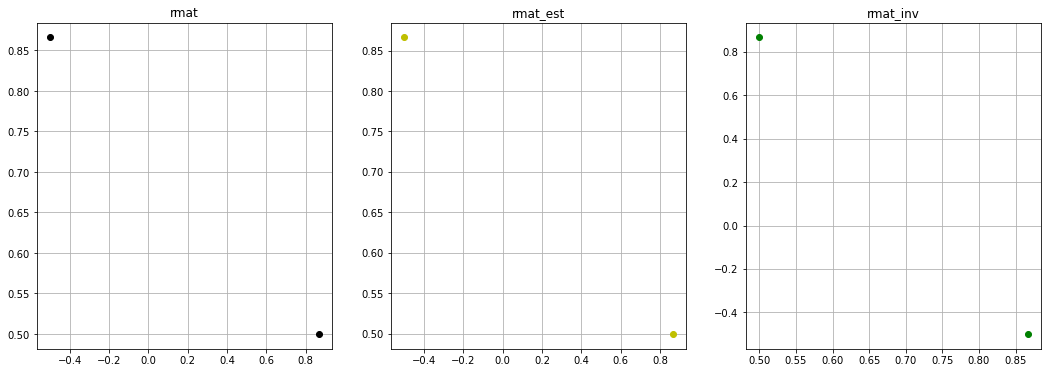

In [7]:
res, rmat_inv = cv2.invert(rmat_est)
assert res != 0


#############################################
print_image('rmat','rmat',rmat,0,5,0,4)
print_image('rmat_est','rmat_est',rmat_est,0,5,0,4)
print_image('rmat_inv','rmat_inv',rmat_inv,0,5,0,4)
print('res',res)

plt.figure(figsize=(18,6))
plt.subplot(131)
plt.axis('on'); plt.grid();
plt.title('rmat')
plt.plot(rmat[:,0],rmat[:,1],'o', color ="k")

plt.subplot(132)
plt.axis('on'); plt.grid();
plt.title('rmat_est')
plt.plot(rmat_est[:,0],rmat_est[:,1],'o', color="y")

plt.subplot(133)
plt.axis('on'); plt.grid();
plt.title('rmat_inv')
plt.plot(rmat_inv[:,0],rmat_inv[:,1],'o',color="green")
plt.show()

------  pts----------------------    Shape(50, 2) pts: float64
[ 138.446882421075 284.0224247835971 ]
[ 107.68225100994503 306.41920641500184 ]
[ 160.2352399797394 302.7428573573656 ]
[ 93.95661501479029 268.5145263476834 ]
[ 154.32949513128915 321.69141652604003 ]
------  pts_est------------------    Shape(50, 2) pts_est: float64
[ 138.58078128511897 283.9571166399515 ]
[ 107.82671319309816 306.3684010542563 ]
[ 160.37796295296428 302.6672741003303 ]
[ 94.08320697662087 268.4701967253582 ]
[ 154.48115285178326 321.6186156732734 ]


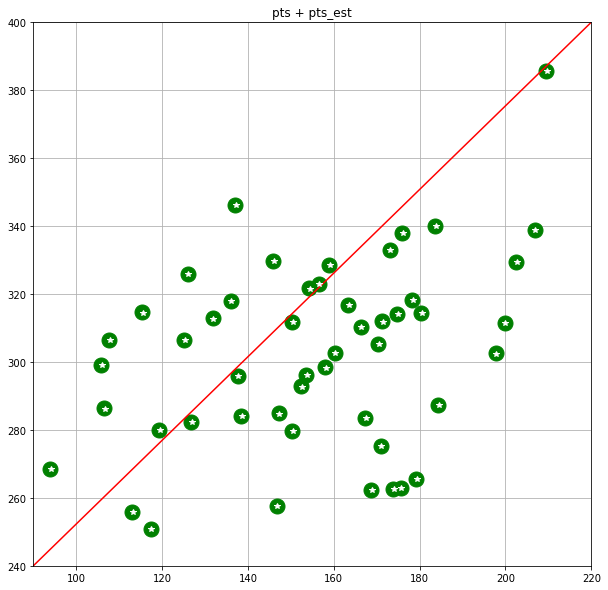

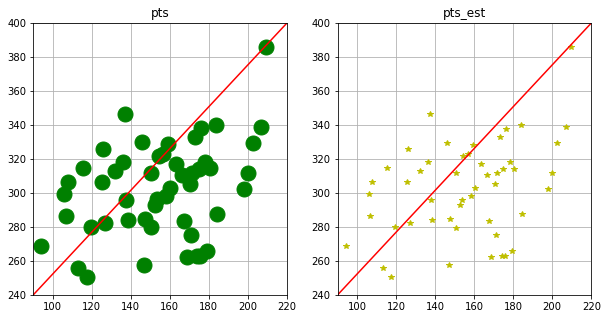

In [8]:
pts_est = np.matmul(rpts, rmat_inv.transpose())



###############################################
print_image('pts','pts',pts,0,5,0,4)
print_image('pts_est','pts_est',pts_est,0,5,0,4)


plt.figure(figsize=(10,10))
plt.subplot(111)
plt.axis('on'); plt.grid(); plt.ylim(240, 400); plt.xlim(90, 220);
plt.title('pts + pts_est')
plt.plot(pts[:,0],pts[:,1],'o',color="green", markersize=15)
plt.plot([90,220], [240,400], color='red')
plt.plot(pts_est[:,0],pts_est[:,1],'*', color="w")
plt.show()

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.axis('on'); plt.grid(); plt.ylim(240, 400); plt.xlim(90, 220);
plt.title('pts')
plt.plot(pts[:,0],pts[:,1],'o',color="green", markersize=15)
plt.plot([90,220], [240,400], color='red')

plt.subplot(122)
plt.axis('on'); plt.grid(); plt.ylim(240, 400); plt.xlim(90, 220);
plt.title('pts_est')
plt.plot(pts_est[:,0],pts_est[:,1],'*', color="y")
plt.plot([90,220], [240,400], color='red')
plt.show()

------  pts----------------------    Shape(50, 2) pts: float64
[ 138.446882421075 284.0224247835971 ]
[ 107.68225100994503 306.41920641500184 ]
[ 160.2352399797394 302.7428573573656 ]
[ 93.95661501479029 268.5145263476834 ]
[ 154.32949513128915 321.69141652604003 ]
------  pts_est------------------    Shape(50, 2) pts_est: float64
[ 138.58078128511897 283.9571166399515 ]
[ 107.82671319309816 306.3684010542563 ]
[ 160.37796295296428 302.6672741003303 ]
[ 94.08320697662087 268.4701967253582 ]
[ 154.48115285178326 321.6186156732734 ]
------  rpts---------------------    Shape(50, 2) rpts: float64
[ 261.90972964320673 176.74719389651256 ]
[ 246.46516811880582 211.52569145788672 ]
[ 290.139217082633 182.0653852958976 ]
[ 215.62607863024448 185.56209359484467 ]
[ 294.4989715999433 201.42819132530732 ]
------  rpts_noise---------------    Shape(50, 2) rpts_noise: float64
[ 268.93432856131824 174.79184139742927 ]
[ 255.62486726656184 233.0645862462005 ]
[ 286.82778830054133 178.75418869619466 

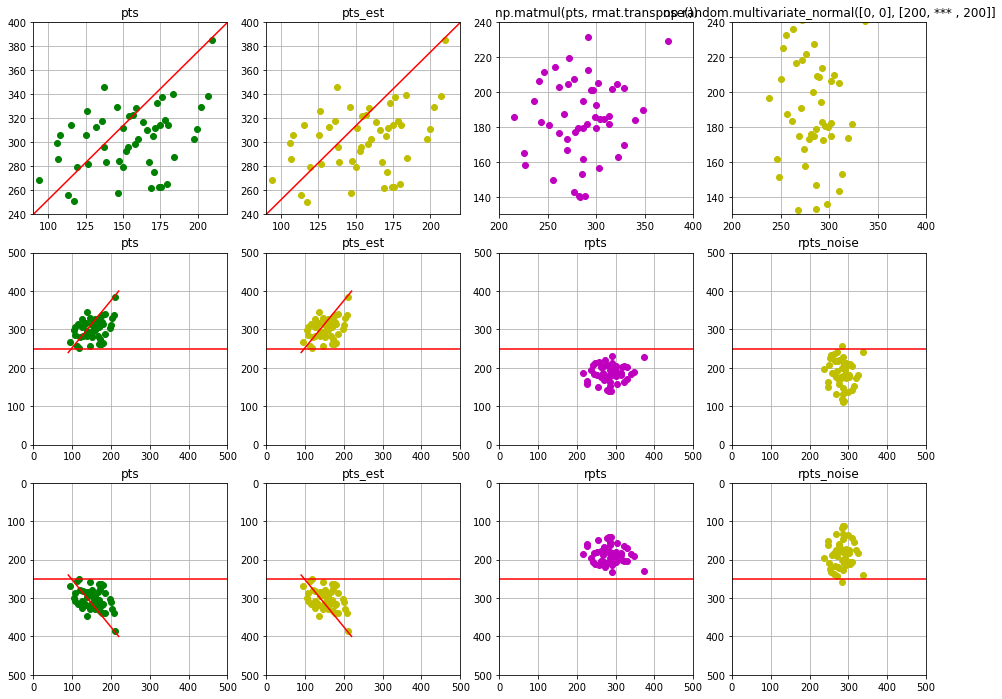

In [9]:
print_image('pts','pts',pts,0,5,0,4)
print_image('pts_est','pts_est',pts_est,0,5,0,4)
print_image('rpts','rpts',rpts,0,5,0,4)
print_image('rpts_noise','rpts_noise',rpts_noise,0,5,0,4)


plt.figure(figsize=(16,12))
plt.subplot(341)
plt.axis('on'); plt.grid(); plt.ylim(240, 400); plt.xlim(90, 220);
plt.title('pts')
plt.plot(pts[:,0],pts[:,1],'o',color="green")
plt.plot([90,220], [240,400], color='red')

plt.subplot(342)
plt.axis('on'); plt.grid(); plt.ylim(240, 400); plt.xlim(90, 220);
plt.title('pts_est')
plt.plot(pts_est[:,0],pts_est[:,1],'o', color="y")
plt.plot([90,220], [240,400], color='red')

plt.subplot(343)
plt.axis('on'); plt.grid(); plt.xlim(200, 400); plt.ylim(130, 240);
plt.title('np.matmul(pts, rmat.transpose())')
plt.plot(rpts[:,0],rpts[:,1],'o', color="m")

plt.subplot(344)
plt.axis('on'); plt.grid(); plt.xlim(200, 400); plt.ylim(130, 240);
plt.title('np.random.multivariate_normal([0, 0], [200, *** , 200]]')
plt.plot(rpts_noise[:,0],rpts_noise[:,1],'o',color="y")

plt.subplot(345)
plt.axis('on'); plt.grid(); plt.ylim(0, 500); plt.xlim(0, 500);
plt.title('pts')
plt.plot(pts[:,0],pts[:,1],'o',color="green")
plt.plot([90,220], [240,400], color='red')
plt.plot([0,500], [250,250], color='red')

plt.subplot(346)
plt.axis('on'); plt.grid(); plt.ylim(0, 500); plt.xlim(0, 500);
plt.title('pts_est')
plt.plot(pts_est[:,0],pts_est[:,1],'o', color="y")
plt.plot([90,220], [240,400], color='red')
plt.plot([0,500], [250,250], color='red')

plt.subplot(347)
plt.axis('on'); plt.grid(); plt.ylim(0, 500); plt.xlim(0, 500);
plt.title('rpts')
plt.plot(rpts[:,0],rpts[:,1],'o', color="m")
plt.plot([0,500], [250,250], color='red')

plt.subplot(348)
plt.axis('on'); plt.grid(); plt.ylim(0, 500); plt.xlim(0, 500);
plt.title('rpts_noise')
plt.plot(rpts_noise[:,0],rpts_noise[:,1],'o',color="y")
plt.plot([0,500], [250,250], color='red')

plt.subplot(349)
plt.axis('on'); plt.grid(); plt.ylim(0, 500); plt.xlim(0, 500);
plt.title('pts')
plt.plot(pts[:,0],pts[:,1],'o',color="green")
plt.plot([90,220], [240,400], color='red')
plt.plot([0,500], [250,250], color='red')
plt.gca().invert_yaxis()

plt.subplot(3,4,10)
plt.axis('on'); plt.grid(); plt.ylim(0, 500); plt.xlim(0, 500);
plt.title('pts_est')
plt.plot(pts_est[:,0],pts_est[:,1],'o', color="y")
plt.plot([90,220], [240,400], color='red')
plt.plot([0,500], [250,250], color='red')
plt.gca().invert_yaxis()

plt.subplot(3,4,11)
plt.axis('on'); plt.grid(); plt.ylim(0, 500); plt.xlim(0, 500);
plt.title('rpts')
plt.plot(rpts[:,0],rpts[:,1],'o', color="m")
plt.plot([0,500], [250,250], color='red')
plt.gca().invert_yaxis()

plt.subplot(3,4,12)
plt.axis('on'); plt.grid(); plt.ylim(0, 500); plt.xlim(0, 500);
plt.title('rpts_noise')
plt.plot(rpts_noise[:,0],rpts_noise[:,1],'o',color="y")
plt.plot([0,500], [250,250], color='red')
plt.gca().invert_yaxis()

plt.show()

In [10]:
rpts_err = cv2.norm(rpts, rpts_noise, cv2.NORM_L2)
pts_err = cv2.norm(pts_est, pts, cv2.NORM_L2)
rmat_err = cv2.norm(rmat, rmat_est, cv2.NORM_L2)


###############################################
print("rpts_err = ", rpts_err)
print("pts_err = ",pts_err)
print("rmat_err =",rmat_err)

rpts_err =  128.6317452162366
pts_err =  1.1408887381592496
rmat_err = 0.0006667901586059355


Display our data, showing initial points as green-filled circles, rotated points as yellow-filled circles, rotated back points as thin white circles, and rotated points with noise as thin red circles. Then, print the information about $L2$ differences between the points and matrices and show the resulting image:


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


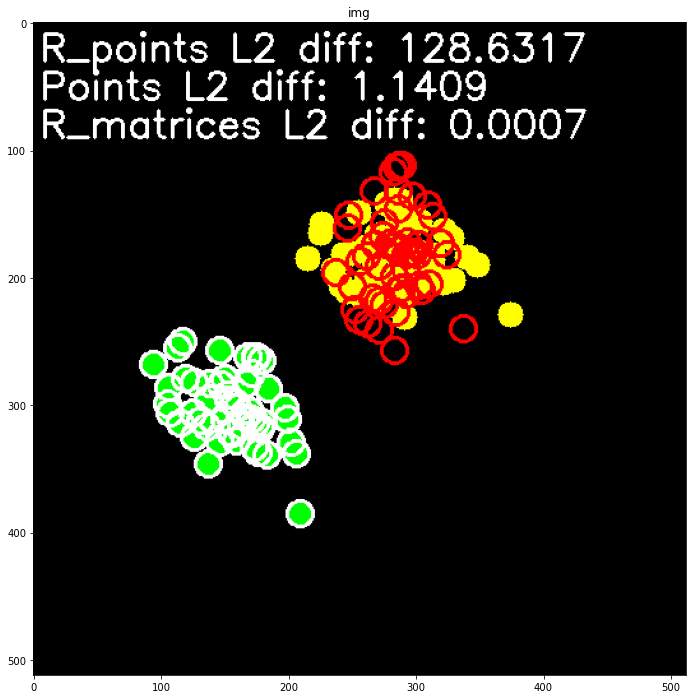

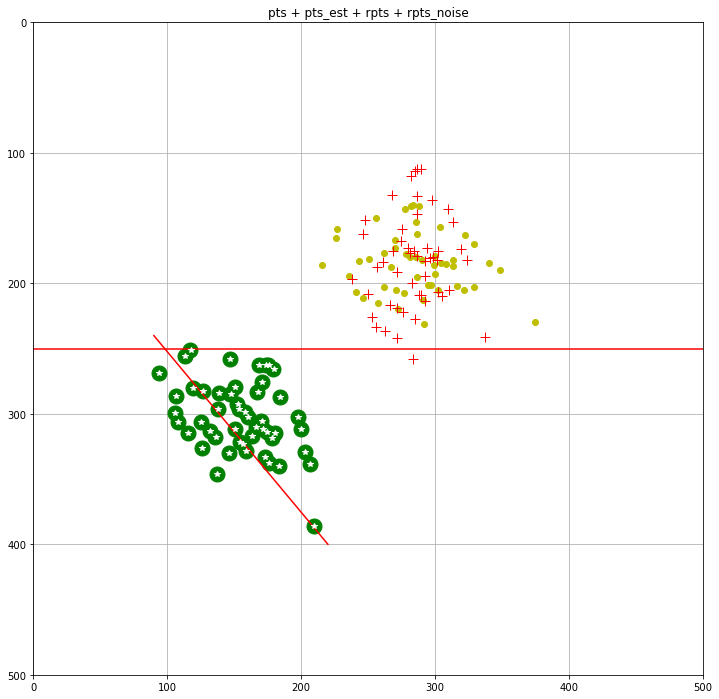

In [11]:
def draw_pts(image, points, color, thickness=cv2.FILLED):
    for pt in points:
        cv2.circle(img, tuple([int(x) for x in pt]), 10, color, thickness)

img = np.zeros([512, 512, 3])

draw_pts(img, pts, (0, 255, 0))
draw_pts(img, pts_est, (255, 255, 255), 2)
draw_pts(img, rpts, (0, 255, 255))
draw_pts(img, rpts_noise, (0, 0, 255), 2)

cv2.putText(img, 'R_points L2 diff: %.4f' % rpts_err, (5, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
cv2.putText(img, 'Points L2 diff: %.4f' % pts_err, (5, 60), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
cv2.putText(img, 'R_matrices L2 diff: %.4f' % rmat_err, (5, 90), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)


####################################################
plt_view_image(plt,[["img",img[:,:,[2,1,0]]]],
               figsize=(12,12),axis='on',cmap='gray')

plt.figure(figsize=(12,12))
plt.subplot(111)
plt.axis('on'); plt.grid(); plt.ylim(0, 500); plt.xlim(0, 500);
plt.title('pts + pts_est + rpts + rpts_noise')
plt.plot(pts[:,0],pts[:,1],'o',color="green",markersize=15)
plt.plot([90,220], [240,400], color='red')
plt.plot([0,500], [250,250], color='red')
plt.plot(pts_est[:,0],pts_est[:,1],'*', color="w")
plt.plot(rpts[:,0],rpts[:,1],'o', color="y")
plt.plot(rpts_noise[:,0],rpts_noise[:,1],'+',color="r",markersize=10)
plt.gca().invert_yaxis()
plt.show()

cv2.imshow('Points', img)
cv2.waitKey()
cv2.destroyAllWindows()